## Project 1: Exploring Bias In Data-COMPAS

## Project Objective: 
### Explore COMPAS/Propublica Data for any relationship between Gender and Recidivism Scores

- Visualize the gender distribution using count plots.
- Calculate the percentage of each gender and check for any disproportionate representation.
- Use boxenplots to show how juvenile felony counts vary by gender and look for any outliers.
- Explore the data to understand juvenile felony counts based on gender
- Calculate rates of violent recidivism based on gender
- Visualize and explore the data for additional insights about rates of violent recidivism for gender
- Discuss any gender-related trends in the dataset.


## Section 1: Import Libraries

In [1]:
#Import initial Anaconda Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

## Section 2: Import Data


In [3]:
# Code Block 02
#Import dataset from Kaggle: cox-violent-parsed-filter.csv

df_cvpf = pd.read_csv('cox-violent-parsed_filt.csv', index_col = None, header=0)

In [4]:
#Code Block 03
#View data info

df_cvpf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11001 non-null  float64
 1   name                     18316 non-null  object 
 2   first                    18316 non-null  object 
 3   last                     18316 non-null  object 
 4   sex                      18316 non-null  object 
 5   dob                      18316 non-null  object 
 6   age                      18316 non-null  int64  
 7   age_cat                  18316 non-null  object 
 8   race                     18316 non-null  object 
 9   juv_fel_count            18316 non-null  int64  
 10  decile_score             18316 non-null  int64  
 11  juv_misd_count           18316 non-null  int64  
 12  juv_other_count          18316 non-null  int64  
 13  priors_count             18316 non-null  int64  
 14  days_b_screening_arres

In [6]:
#Code Block 04
df_cvpf.head()

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0


In [10]:
#Code Block 05
#Drop duplicate names

df_cvpf=df_cvpf.drop_duplicates(subset=['name'])
df_cvpf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10855 entries, 0 to 18314
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6560 non-null   float64
 1   name                     10855 non-null  object 
 2   first                    10855 non-null  object 
 3   last                     10855 non-null  object 
 4   sex                      10855 non-null  object 
 5   dob                      10855 non-null  object 
 6   age                      10855 non-null  int64  
 7   age_cat                  10855 non-null  object 
 8   race                     10855 non-null  object 
 9   juv_fel_count            10855 non-null  int64  
 10  decile_score             10855 non-null  int64  
 11  juv_misd_count           10855 non-null  int64  
 12  juv_other_count          10855 non-null  int64  
 13  priors_count             10855 non-null  int64  
 14  days_b_screening_arrest  97

In [12]:
#Code Block 06
# Fill NaNs with 0
df_cvpf_clean=df_cvpf.fillna(0)
df_cvpf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10855 entries, 0 to 18314
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       10855 non-null  float64
 1   name                     10855 non-null  object 
 2   first                    10855 non-null  object 
 3   last                     10855 non-null  object 
 4   sex                      10855 non-null  object 
 5   dob                      10855 non-null  object 
 6   age                      10855 non-null  int64  
 7   age_cat                  10855 non-null  object 
 8   race                     10855 non-null  object 
 9   juv_fel_count            10855 non-null  int64  
 10  decile_score             10855 non-null  int64  
 11  juv_misd_count           10855 non-null  int64  
 12  juv_other_count          10855 non-null  int64  
 13  priors_count             10855 non-null  int64  
 14  days_b_screening_arrest  10

## Section 1: Gender Representation

In [14]:
#Code Block 07
#Used AI Assistant
#Calculate the counts and percentage of each gender in the dataset

#Gender counts
gender_counts = df_cvpf['sex'].value_counts()

#Gender percentages
gender_percentages = (gender_counts / gender_counts.sum()) * 100

# Combine counts and percentages into a DataFrame
df_gen_dist = pd.DataFrame({ "Count": gender_counts,"Percentage": gender_percentages})

df_gen_dist = df_gen_dist.reset_index()
df_gen_dist.head()

,sex,Count,Percentage
0,Male,8604,79.263012
1,Female,2251,20.736988


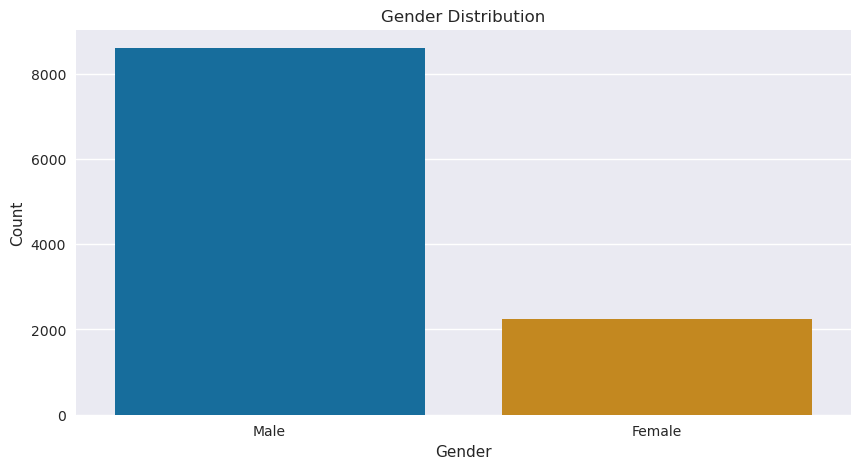

In [16]:
#Code Block 08
#Create count plot for gender distribution within the dataset

plt.figure(figsize=(10, 5)) 
ax = sns.countplot(x= 'sex', data=df_cvpf_clean, palette = 'colorblind')
# Add labels and title

plt.xlabel("Gender")  # Label for the x-axis
plt.ylabel("Count")   # Label for the y-axis
plt.title("Gender Distribution")  # Title of the plot

# Display the plot
plt.show()

## Summary of Section 1: Gender Representation

- Gender Representation in the data set:
  - Male: 8604 and 79.3%
  - Female: 2251 and 20.7%
 
- This baseline disproportionality sets the tone for what is to be discovered throughout the data set
  - All things being equal will not truly be equal from a gender standpoint with reegards to risk assesment of recidivism due to the inequality seen from the start.


## Section 2: Juvenile Felony Counts by Gender

In [20]:
#Code Block 09
#Juvenile Felony Value_Counts grouped and sorted  by gender 

juv_fel_gen = df_cvpf.groupby('sex')['juv_fel_count'].value_counts()
df_juv_fel_gen = pd.DataFrame(juv_fel_gen).reset_index()
df_juv_fel_gen = df_juv_fel_gen.sort_values('sex', ascending = False)
df_juv_fel_gen.head(20)

,sex,juv_fel_count,count
4,Male,0,8258
5,Male,1,225
6,Male,2,63
7,Male,3,26
8,Male,4,16
9,Male,5,7
10,Male,6,2
11,Male,8,2
12,Male,10,2
13,Male,9,1


In [22]:
#Code Block 10 -Used Notebook AI Assistant
#Group the DataFrame by 'sex' and get descriptive statistics for 'juv_fel_count' for all people in the dataset
description_by_sex = df_cvpf_clean.groupby('sex')['juv_fel_count'].describe()

df_description_by_sex = pd.DataFrame(description_by_sex).reset_index()
df_description_by_sex

,sex,count,mean,std,min,25%,50%,75%,max
0,Female,2251.0,0.013327,0.145450,0.0,0.0,0.0,0.0,3.0
1,Male,8604.0,0.071827,0.499635,0.0,0.0,0.0,0.0,20.0


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


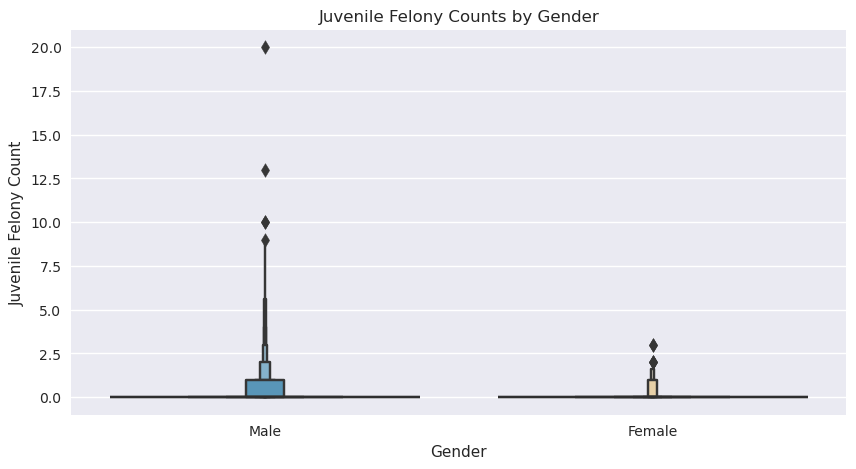

In [24]:
#Code Block 11
#Use boxennplots to show how juvenile felony counts vary by gender. 

plt.figure(figsize=(10, 5))
sns.boxenplot(x="sex", y="juv_fel_count", data=df_cvpf_clean, palette = 'colorblind')

# Create labels for the plot
plt.title("Juvenile Felony Counts by Gender")
plt.xlabel("Gender")
plt.ylabel("Juvenile Felony Count")

# Show the plot
plt.show()

In [26]:
#Code Block 12 - Used Jupyter AI Assistant for help with the organization of the code
# View number of those with at least one juvenile felony count and compare by Gender

#Filter the DataFrame for juvenile felony counts greater than 0 and groupby 'sex'
filtered_df = df_juv_fel_gen[df_juv_fel_gen['juv_fel_count'] > 0]

# Group by 'sex' and sum the 'juv_fel_count'
df_filtered_df = pd.DataFrame(filtered_df.groupby('sex')['count'].sum())
df_filtered_df= df_filtered_df.reset_index()
df_filtered_df= df_filtered_df.sort_values('sex', ascending = False)
df_filtered_df.head()

,sex,count
1,Male,346
0,Female,23


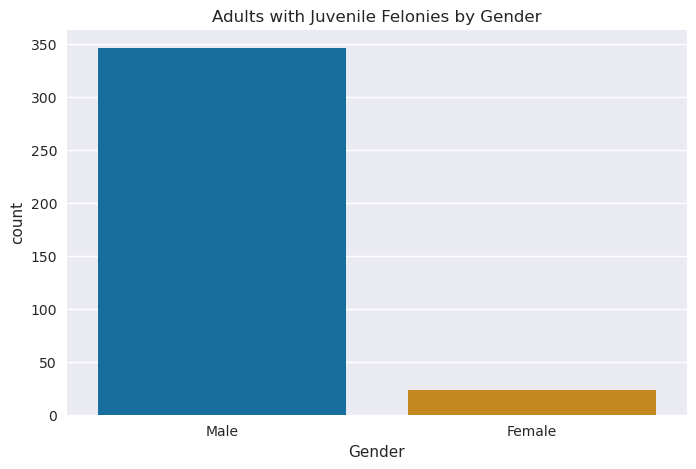

In [37]:
#Code Block 13
#Creating the bar plot for the count of those with juvenile felony by gender

plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='count', data = df_filtered_df, palette = 'colorblind')
plt.title('Adults with Juvenile Felonies by Gender')
plt.xlabel('Gender')
plt.ylabel('count')

plt.show()


## Summary Section 2: Adults with Juvenile Felony Charges by Gender
- Overall, 7.2% of males and 1.3% of all females in the data set had a juvenile felony charge
- While the boxen plot doesn't show much variation within the median quartiles, it highlights the outliers for both genders and additional disproportionality: 
  - For males, we can see that there are several dots outside within the upper quartile and those numbers have a larger spread, extending to 20 (i.e. at least one male in this set had 20 juvenile felony counts)
  - For females, we can see a few outliers with a small spread into the upper quartile extending only to 3
- The actual value counts for number of juvenile felony counts be gender is also listed in the dataframe above the descriptive statistics above the graph for reference
- The total counts for those with at least one juvenile felony are:
  - Male-346
  - Female- 23

## Section 3: Recidivism by Gender and False Assessment Scores

In [47]:
# Code Block 14
#Grouping recidivism rates by gender and creating a new dataframe

df_recid_gender = df_cvpf.groupby('sex')['is_recid'].describe()
df_recid_gender= pd.DataFrame(df_recid_gender)
df_recid_gender=df_recid_gender.reset_index()
df_recid_gender=df_recid_gender.sort_values('sex', ascending = False)
df_recid_gender.head()

,sex,count,mean,std,min,25%,50%,75%,max
1,Male,8604.0,0.278010,0.564249,-1.0,0.0,0.0,1.0,1.0
0,Female,2251.0,0.171035,0.517752,-1.0,0.0,0.0,0.0,1.0


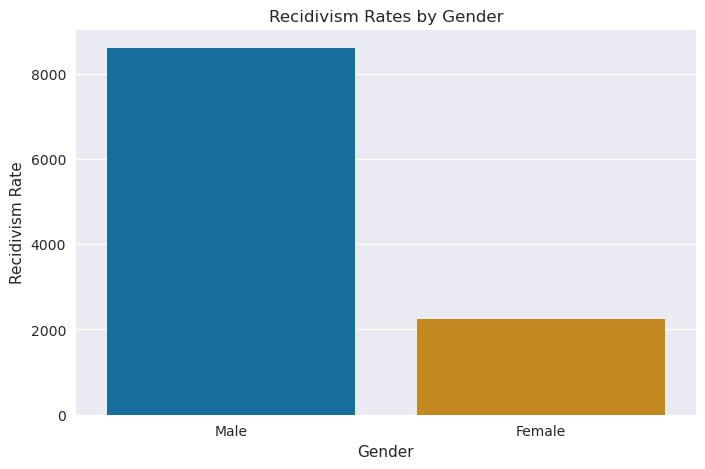

In [49]:
#Code Block 15
#Creating the bar plot for recidivism rates by gender

plt.figure(figsize=(8, 5))
sns.barplot(x='sex' , y='count', data = df_recid_gender, palette = 'colorblind')
plt.title('Recidivism Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Recidivism Rate')

plt.show()

In [55]:
#Code Block 16
#View limited columns in the data set for easier viewing and organization

df_cvpf_clean[['sex','is_recid', 'type_of_assessment', 'decile_score.1', 'score_text']].head(10)

,sex,is_recid,type_of_assessment,decile_score.1,score_text
0,Male,0,Risk of Recidivism,1,Low
2,Male,-1,Risk of Recidivism,5,Medium
3,Male,1,Risk of Recidivism,3,Low
4,Male,1,Risk of Recidivism,4,Low
9,Male,0,Risk of Recidivism,8,High
10,Male,0,Risk of Recidivism,1,Low
11,Male,0,Risk of Recidivism,1,Low
12,Male,1,Risk of Recidivism,6,Medium
14,Male,0,Risk of Recidivism,4,Low
17,Female,0,Risk of Recidivism,1,Low


In [57]:
#Code Block 17
#View decile scores and score text by gender to identify the definition of "High" score

df_cvpf_clean.groupby('sex')[['decile_score.1','score_text']].value_counts()

sex     decile_score.1  score_text
Female   1              Low            488
         2              Low            331
         3              Low            283
         4              Low            250
         5              Medium         229
         6              Medium         216
         7              Medium         153
         9              High           110
         8              High           107
         10             High            80
        -1              0                4
Male     1              Low           1884
         2              Low           1126
         3              Low            885
         4              Low            864
         5              Medium         732
         6              Medium         700
         7              Medium         684
         8              High           632
         9              High           617
         10             High           470
        -1              0               10
Name: count, dtype:

In [59]:
#Code Block 18
#View value counts for recidivism by gender
df_cvpf_clean.groupby('sex')['is_recid'].value_counts()

sex     is_recid
Female   0          1582
         1           527
        -1           142
Male     0          5200
         1          2898
        -1           506
Name: count, dtype: int64

In [61]:
#Code Block 19
#Count total high-risk individuals by gender
# ChatGPT was used for coding help 

high_risk_counts = df_cvpf_clean[df_cvpf_clean['score_text'] == "High"].groupby('sex').size()
print("High Risk Counts:\n", high_risk_counts)

#Count high-risk individuals who did NOT recidivate (is_recid == 0)
false_positives = df_cvpf_clean[(df_cvpf_clean['score_text'] == "High") & (df_cvpf_clean['is_recid'] == 0)].groupby('sex').size()
print("False Positives (High Risk, No Recidivism):\n", false_positives)

#Calculate false positive rate
false_positive_rate = (false_positives / high_risk_counts)
print("\nFalse Positive Rate:\n", false_positive_rate)


High Risk Counts:
 sex
Female     297
Male      1719
dtype: int64
False Positives (High Risk, No Recidivism):
 sex
Female    157
Male      738
dtype: int64

False Positive Rate:
 sex
Female    0.528620
Male      0.429319
dtype: float64


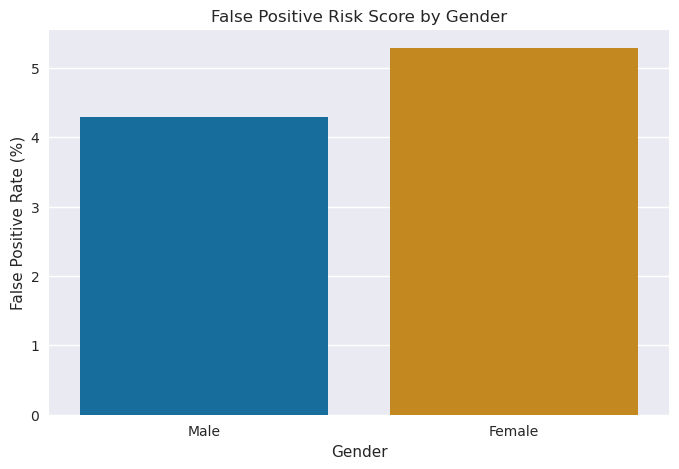

In [102]:
#Code Block 20
#Barplot to show False Positive Rates by Gender
#ChatGPT was used for coding help with calculation
data = {
    'sex': ['Female', 'Male'],
    'high_risk_counts': [297, 1719],  
    'false_positives': [157, 738]    
}

# Create a DataFrame to simulate the calculation
df_false_positives = pd.DataFrame(data)

# Calculate the false positives rate
df_false_positives['false_positives_rate'] = (df_false_positives['false_positives'] / df_false_positives['high_risk_counts']) * 10

df_false_positives = df_false_positives.sort_values('sex', ascending = False)

#Plot the graph
plt.figure(figsize=(8, 5))
sns.barplot(x='sex' , y='false_positives_rate', data = df_false_positives , palette = 'colorblind')
plt.title('False Positive Risk Score by Gender')
plt.xlabel('Gender')
plt.ylabel('False Positive Rate (%)')

plt.show()

In [93]:
#Code Block 21
#Used Chat GPT for assistance 
#Count total low-risk individuals by gender
low_risk_counts = df_cvpf_clean[df_cvpf_clean['score_text'] == "Low"].groupby('sex').size()
print("Low Risk Counts:\n", low_risk_counts)

#Count high-risk individuals who did recidivate (is_recid == 0)
false_negatives = df_cvpf_clean[(df_cvpf_clean['score_text'] == "Low") & (df_cvpf_clean['is_recid'] == 1)].groupby('sex').size()
print("False Negatives (Low Risk, Recidivism):\n", false_negatives)

#Calculate false positive rate
false_negative_rate = (false_negatives / low_risk_counts)
print("\nFalse Negative Rate:\n", false_negative_rate)


Low Risk Counts:
 sex
Female    1352
Male      4759
dtype: int64
False Negatives (Low Risk, Recidivism):
 sex
Female     209
Male      1105
dtype: int64

False Negative Rate:
 sex
Female    0.154586
Male      0.232192
dtype: float64


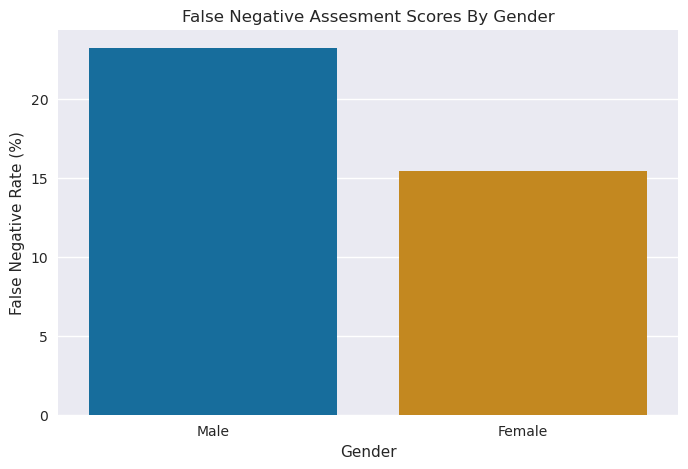

In [110]:
#Code Block 22
#Used ChatGPT
# specifying the data to use
data = {
    'sex': ['Female', 'Male'],
    'low_risk_counts': [1352, 4759],  
    'false_negatives': [209, 1105]    # Replace with actual false negatives
}

# Create a DataFrame to simulate the calculation
df_false_negatives = pd.DataFrame(data)

# Calculate the false negative rate
df_false_negatives['false_negatives_rate'] = (df_false_negatives['false_negatives'] / df_false_negatives['low_risk_counts']) * 100

df_false_negatives = df_false_negatives.sort_values('sex', ascending = False)

#Plot the graph
plt.figure(figsize=(8, 5))
sns.barplot(x='sex' , y='false_negatives_rate', data = df_false_negatives , palette = 'colorblind')
plt.title('False Negative Assesment Scores By Gender')
plt.xlabel('Gender')
plt.ylabel('False Negative Rate (%)')

plt.show()


## Summary Section 3: Recidivism By Gender and False Risk Ratings

- Average rate of recidivism for all in the data set is: 
Male: 27.8%
Female: 17.1%

- False Positive: 
Female: 297 HR and 157 Recid for a rate of 52.9%
Male: 1719 HR and 738 recid for a rate of 43.0%

- False Negative: 
Female: 1352 LR 209 recid for a rate of 15.5%
Male: 4759 LR 1105 recid for a rate of 23.2%

- Men are on average 10% more likely to recidivate
-Surprisingly, women had higher false positive scores
-Surprising also that men had higher rates of false negatives, especially due to the disproportionality of men to women.
- Needs further investigation into the factors for risk scores
